# Sales Prediction for Big Mart Outlets


#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.
####  Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.
####  Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [379]:
train=pd.read_csv('train_v9rqX0R.csv')
test=pd.read_csv('test_AbJTz2l.csv')

In [146]:
data=pd.concat([train,test],axis=0,ignore_index=False)

In [346]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [347]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# EDA(univariate)


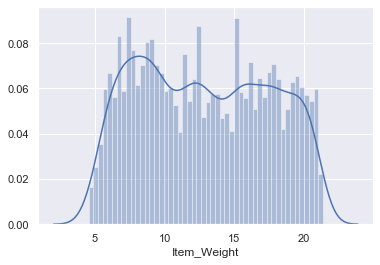

In [348]:
sns.distplot(train.Item_Weight,bins=50)
# Item_weigh doesnt show any specific trend

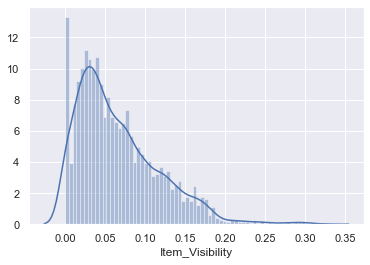

In [349]:
sns.distplot(train.Item_Visibility,bins=70)
# Item visiblity is highly left skewed, and almost all items have a lower visiblity.
#  there are lots of products with zero visibility.

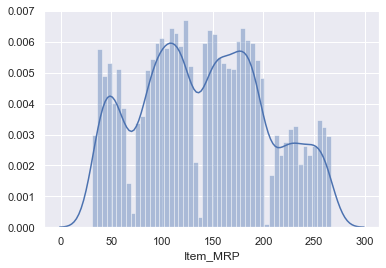

In [351]:
sns.distplot(train.Item_MRP,bins=50)
# SO the MRP of the items are divided into four sections

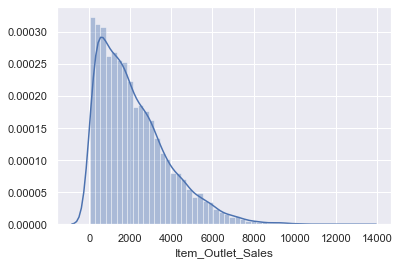

In [353]:
sns.distplot(train.Item_Outlet_Sales,bins=50)
# Sales of items is highly left skewed and many produscts have sales in the range of 0-2000

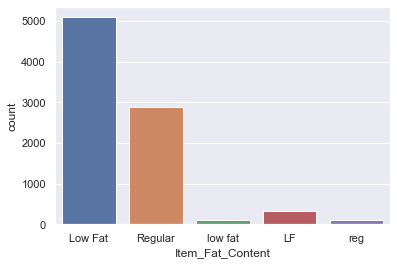

In [355]:
sns.countplot(data=train,x='Item_Fat_Content')
# Low fat has been represented in four ways so we need combine them into one

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

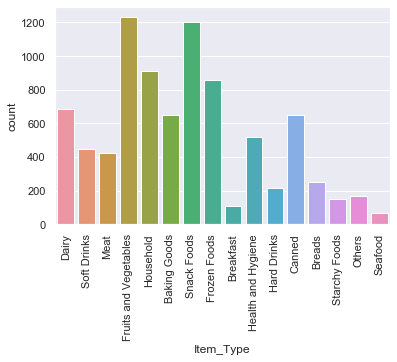

In [356]:
sns.countplot(data=train,x='Item_Type')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

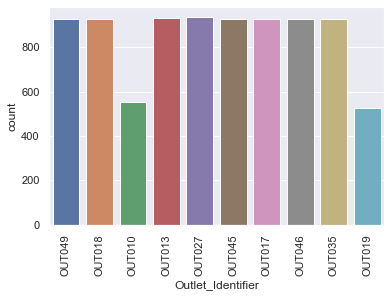

In [358]:
sns.countplot(data=train,x='Outlet_Identifier')
plt.xticks(rotation=90)
# Except outlet 10 and 19 all other outlets have similar range of products.
# So the overall sales might be less over here compared to other outlets due to lower diverse products

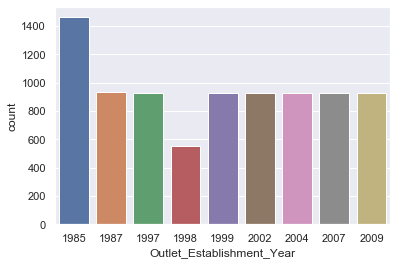

In [359]:
sns.countplot(data=train,x='Outlet_Establishment_Year')
#In 1998 we have lower data

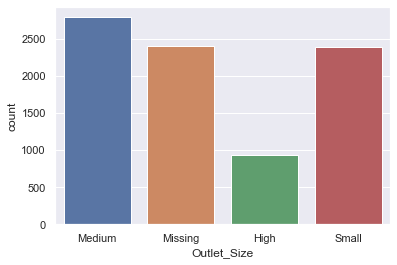

In [360]:
train.Outlet_Size=train.Outlet_Size.fillna('Missing')
test.Outlet_Size=test.Outlet_Size.fillna('Missing')
sns.countplot(data=train,x='Outlet_Size')


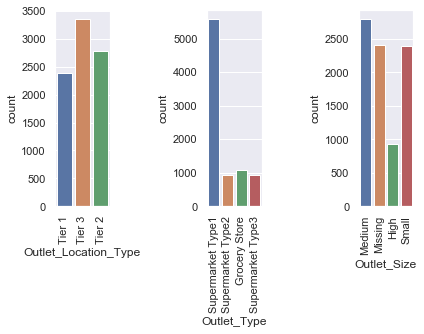

In [362]:
f,ax=plt.subplots(1,3,figsize=(6,4))
plt.xticks(rotation=90)
sns.countplot(data=train,x='Outlet_Location_Type',ax=ax[0])
plt.xticks(rotation=90)
sns.countplot(data=train,x='Outlet_Type',ax=ax[1])

sns.countplot(data=train,x='Outlet_Size',ax=ax[2])
plt.tight_layout()
for i in range(3):
    for tick in ax[i].get_xticklabels():
            tick.set_rotation(90)
plt.show()
# Supermarket type1 is the most popular form of outlet and majority of the outlets are located in tier3 and tier 2 parts.
# And most of the outlets are medium or small sized 

# EDA (Bivariate)

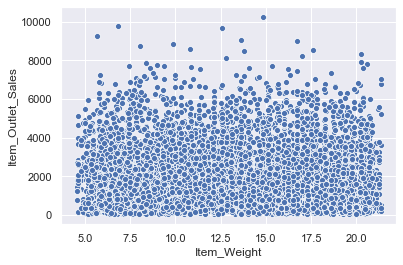

In [364]:
sns.scatterplot(data=train,x='Item_Weight',y='Item_Outlet_Sales')
#The weight of the object doesnot show any impact on the item sales. 
#Almost all the weight range shows similar distribution of item sales

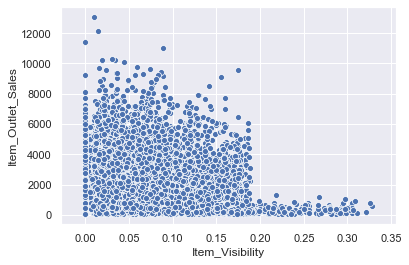

In [365]:
sns.scatterplot(data=train,x='Item_Visibility',y='Item_Outlet_Sales')
# 1. Items with zero visibility 
# 2. The sales of items with visibility greater than .19 has lower sales.
# Inorder to understand this we must check whether there is a relationship with catagorical data
# like outlet type.

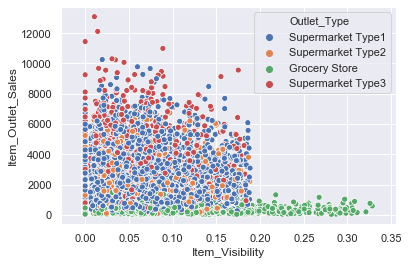

In [366]:
sns.scatterplot(data=train,x='Item_Visibility',y='Item_Outlet_Sales',hue='Outlet_Type')
# grocery store have the ability to have higher visibility  compared to super markets. 
# But the sales produced per item is very less compared to supermakets.

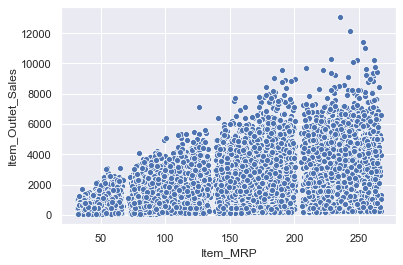

In [368]:
sns.scatterplot(data=train,x='Item_MRP',y='Item_Outlet_Sales')
#Item mrp have high correlation to sales. Item with high MRP sjows higher outlet sales.


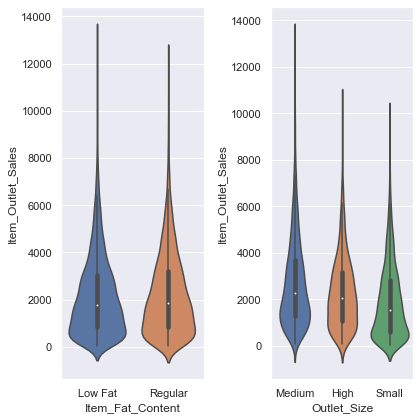

In [380]:
def fat(a):
    if a in ['Low Fat', 'low fat', 'LF']:
        return 'Low Fat'
    else:
        return 'Regular'

train.Item_Fat_Content=train.Item_Fat_Content.apply(fat)

f,ax=plt.subplots(1,2,figsize=(6,6))
sns.violinplot(data=train,x='Item_Fat_Content',y='Item_Outlet_Sales',ax=ax[0])
sns.violinplot(data=train,x='Outlet_Size',y='Item_Outlet_Sales',ax=ax[1])
plt.tight_layout()
#Low fat and regular fat items have similar outlet sales.
#in the second plot we find that small outlet size shows similar outlet sales representation as the missing values,so we can replace the missing outlet size values with 'Small'


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

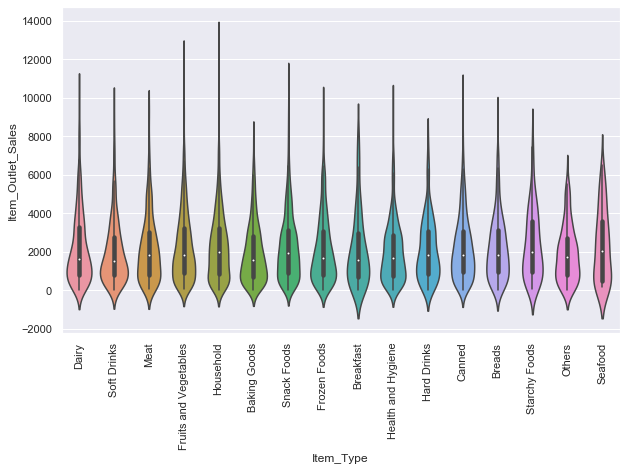

In [372]:
plt.figure(figsize=(10,6))
sns.violinplot(data=train,x='Item_Type',y='Item_Outlet_Sales')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

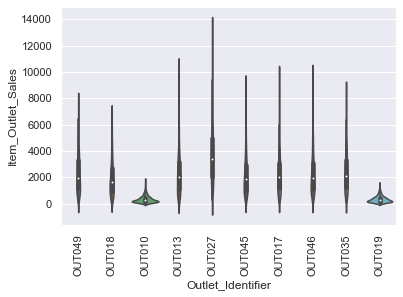

In [374]:

sns.violinplot(data=train,x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.xticks(rotation=90)
#Outlet 10 and 19 shows lower sales compared to other outlets,
#This could be because of the lower product range at these outlets as we saw before.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

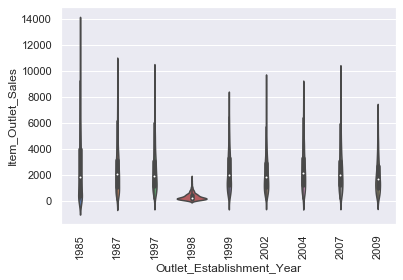

In [375]:
sns.violinplot(data=train,x='Outlet_Establishment_Year',y='Item_Outlet_Sales')
plt.xticks(rotation=90)
# Due to the lower data available for 1998 we wont be able to say much about the sales output. 
# Outlets esthablished in 1985 and 1987 have high outlet sales comparitivley, 
# This may be because customers are used to going to those outlets for a long time that they are used to it.

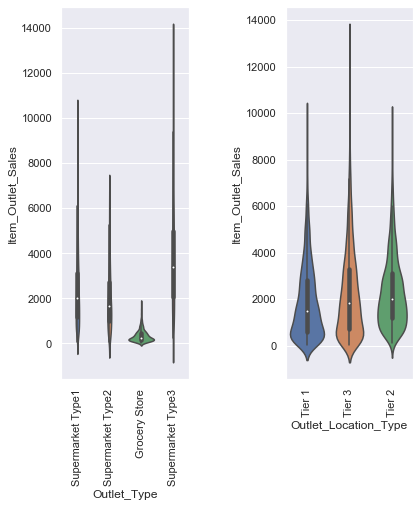

In [376]:
f,ax=plt.subplots(1,2,figsize=(6,6))

sns.violinplot(data=train,x='Outlet_Type',y='Item_Outlet_Sales',ax=ax[0])
sns.violinplot(data=train,x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=ax[1])
plt.tight_layout()
for i in range(2):
    for tick in ax[i].get_xticklabels():
            tick.set_rotation(90)
plt.show()

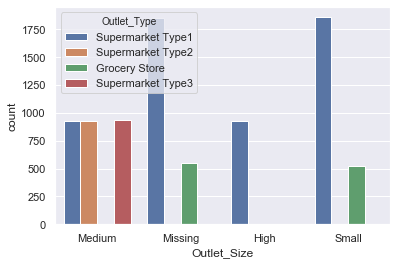

In [377]:
sns.countplot(data=train,x='Outlet_Size',hue='Outlet_Type')

# Filling Missing Values

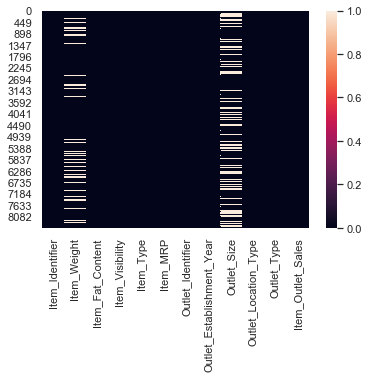

In [381]:
sns.heatmap(train.isnull())

In [147]:
#the pivot table gives the average weight of items with same identifier
#this data can be used to fill up the Null values in Item_Weight
average_weight_of_identifier=data.pivot_table(values='Item_Weight',index='Item_Identifier')
average_weight_of_identifier

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [148]:
#Amount of null values in Item weight column
sum(data.Item_Weight.isnull())

2439

In [149]:
def lol(values):
    identifier=values[0]
    weight = values[1]
    
    if np.isnan(weight):
        return average_weight_of_identifier['Item_Weight'][average_weight_of_identifier.index==identifier]
    else:
        return weight
data['Item_Weight']=data[['Item_Identifier','Item_Weight']].apply(lol,axis=1)

In [150]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [151]:
def fat(a):
    if a in ['Low Fat', 'low fat', 'LF']:
        return 'Low Fat'
    else:
        return 'Regular'
data.Item_Fat_Content=data.Item_Fat_Content.apply(fat)

In [152]:
data.groupby(['Outlet_Type','Outlet_Size','Outlet_Location_Type']).count()
# we can see that:
#  1.Grocery stores are always smalled sized and in tier 1 location
#  2.supermarket type 2& 3 are in tier 3 locations with medium outlet size
#  3.supermarket type 1 has small stores in tier 2 and half of tier 1 
#   and medium sized stores in the other half of tier 1 also High outlet size in tier 3


Item_Identifier  \
Outlet_Type       Outlet_Size Outlet_Location_Type                    
Grocery Store     Small       Tier 1                            880   
Supermarket Type1 High        Tier 3                           1553   
                  Medium      Tier 1                           1550   
                  Small       Tier 1                           1550   
                              Tier 2                           1550   
Supermarket Type2 Medium      Tier 3                           1546   
Supermarket Type3 Medium      Tier 3                           1559   

                                                    Item_Weight  \
Outlet_Type       Outlet_Size Outlet_Location_Type                
Grocery Store     Small       Tier 1                        880   
Supermarket Type1 High        Tier 3                       1553   
                  Medium      Tier 1                       1550   
                  Small       Tier 1                       1550   
                              Tier 2                       1550   
Supermarket Type2 Medium      Tier 3                       1546   
Supermarket Type3 Medium      Tier 3                       1559   

                                                    Item_Fat_Content  \
Outlet_Type       Outlet_Size Outlet_Location_Type                     
Grocery Store     Small       Tier 1                             880   
Supermarket Type1 High        Tier 3                            1553   
                  Medium      Tier 1                            1550   
                  Small       Tier 1                            1550   
                              Tier 2                            1550   
Supermarket Type2 Medium      Tier 3                            1546   
Supermarket Type3 Medium      Tier 3                            1559   

                                                    Item_Visibility  \
Outlet_Type       Outlet_Size Outlet_Location_Type                    
Grocery Store     Small       Tier 1                            880   
Supermarket Type1 High        Tier 3                           1553   
                  Medium      Tier 1                           1550   
                  Small       Tier 1                           1550   
                              Tier 2                           1550   
Supermarket Type2 Medium      Tier 3                           1546   
Supermarket Type3 Medium      Tier 3                           1559   

                                                    Item_Type  Item_MRP  \
Outlet_Type       Outlet_Size Outlet_Location_Type                        
Grocery Store     Small       Tier 1                      880       880   
Supermarket Type1 High        Tier 3                     1553      1553   
                  Medium      Tier 1                     1550      1550   
                  Small       Tier 1                     1550      1550   
                              Tier 2                     1550      1550   
Supermarket Type2 Medium      Tier 3                     1546      1546   
Supermarket Type3 Medium      Tier 3                     1559      1559   

                                                    Outlet_Identifier  \
Outlet_Type       Outlet_Size Outlet_Location_Type                      
Grocery Store     Small       Tier 1                              880   
Supermarket Type1 High        Tier 3                             1553   
                  Medium      Tier 1                             1550   
                  Small       Tier 1                             1550   
                              Tier 2                             1550   
Supermarket Type2 Medium      Tier 3                             1546   
Supermarket Type3 Medium      Tier 3                             1559   

                                                    Outlet_Establishment_Year  \
Outlet_Type       Outlet_Size Outlet_Location_Type                              
Grocery Store     Small

In [153]:
# Defining a function to replace all null values in Outlet_Size
def size(a):
    Size_k=a[0]
    Type=a[1]
    Tier=a[2]
    
    if pd.isnull(Size_k):
        
        if Type=='Grocery Store':
            return 'Small'
        elif Type in ['Supermarket Type3','Supermarket Type2']:
            return 'Medium'
        elif (Type=='Supermarket Type1')&(Tier=='Tier 3'):
            return 'High'
        elif (Type=='Supermarket Type1')&(Tier=='Tier 1'):
            return 'Medium'
        elif (Type=='Supermarket Type1')&(Tier=='Tier 2'):
            return 'Small'
    else:
        return Size_k
        
data['Outlet_Size']=data[['Outlet_Size','Outlet_Type','Outlet_Location_Type']].apply(size,axis=1)
    

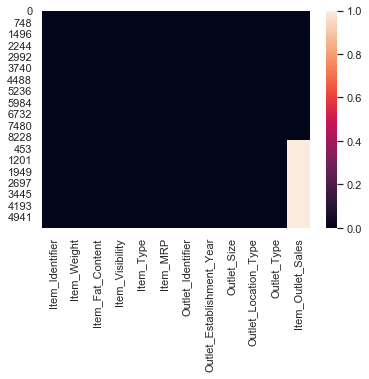

In [154]:
import seaborn as sns
sns.set()
sns.heatmap(data.isnull())

In [155]:
# Items with zero visibility
sum(data.Item_Visibility==0)

879

In [156]:
# Mean visibility
mean=data[data.Item_Visibility>0]['Item_Visibility'].mean()

In [157]:
data.Item_Visibility=data.Item_Visibility.apply(lambda X: mean if X==0 else X)
# No products have zero visibility
sum(data.Item_Visibility==0)

0

# Feature Engineering

In [158]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [159]:
# item type can be divided into a broder category of Food ,Drinks , Non-Consumables
data.Item_Type.unique()
drink=['Dairy', 'Soft Drinks','Hard Drinks']
food=[ 'Meat', 'Fruits and Vegetables','Baking Goods', 'Snack Foods', 'Frozen Foods','Breakfast','Canned',
       'Breads', 'Starchy Foods','Seafood']
data['Item_Category']=data.Item_Type.apply(lambda X: 'FD' if X in food else('DR' if X in drink else 'NC'))

In [160]:
# Non consumable items are not supposed to have fat content
# we need to make a new label under fat content called Non-edible
print(data.Item_Fat_Content[data.Item_Category=='NC'].head())
data.Item_Fat_Content=data[['Item_Category','Item_Fat_Content']].apply(lambda X: 'Non-Edible' if X[0]=='NC' else X[1],axis=1)

4     Low Fat
16    Low Fat
22    Low Fat
25    Low Fat
31    Low Fat
Name: Item_Fat_Content, dtype: object


In [161]:
# Number of Operational years from 2013
data['Years_of_Operation']=2013-data.Outlet_Establishment_Year

In [162]:
# food type can be further divided into Perishable and Non-Perishable
Perishable=['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables','Baking Goods', 'Snack Foods','Breakfast',
       'Breads', 'Starchy Foods','Seafood']
data['Item_Type_New']=data.Item_Type.apply(lambda X: 'Perishable' if X in Perishable else 'Non_Perishable')

In [163]:
# Price per unit weight
data['Price_per_weight']=data.Item_MRP/data.Item_Weight
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Years_of_Operation,Item_Type_New,Price_per_weight
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,DR,14,Perishable,26.8612
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,Perishable,8.15358
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,Perishable,8.09246
3,FDX07,19.2,Regular,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15,Perishable,9.48411
4,NCD19,8.93,Non-Edible,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,Non_Perishable,6.03151


# Pre Processing Data

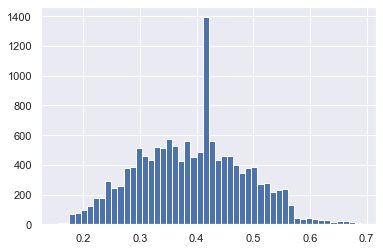

In [164]:
# removing Skewness of visibility and price per weight by transormation
data.Item_Visibility.apply(lambda X: X**(1/3)).hist(bins=50)
data.Item_Visibility=data.Item_Visibility.apply(lambda X: X**(1/3))

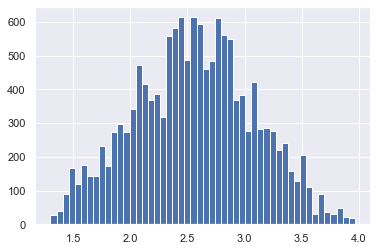

In [165]:

data.Price_per_weight.apply(lambda X:np.log(X+2)).hist(bins=50)

data.Price_per_weight=data.Price_per_weight.apply(lambda X:np.log(X+2))

In [166]:
# Creating Dummy variables for Regression
new_data=pd.concat([data,pd.get_dummies(data.Item_Fat_Content,drop_first=True),pd.get_dummies(data.Outlet_Size,drop_first=True),pd.get_dummies(data.Outlet_Location_Type,drop_first=True),pd.get_dummies(data.Outlet_Type,drop_first=True),pd.get_dummies(data.Item_Category,drop_first=True),pd.get_dummies(data.Item_Type_New,drop_first=True),pd.get_dummies(data.Outlet_Identifier,drop_first=True)],axis=1)

In [326]:
# Dropping unnecessary data
new_data.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Category','Item_Type_New'],axis=1,inplace=True)
new_data.Item_Weight=new_data.Item_Weight.astype(float)
new_data.Price_per_weight=new_data.Price_per_weight.astype(float)

In [168]:
#splitting data into test and train
X=new_data[:train.shape[0]].drop('Item_Outlet_Sales',axis=1)
y=new_data[:train.shape[0]]['Item_Outlet_Sales']
test=new_data[train.shape[0]:].drop('Item_Outlet_Sales',axis=1)

# Linear regression Model

In [183]:
# Import Sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_CV, y_train, y_CV = train_test_split(X, y, test_size=0.3, random_state=42)

In [185]:
LR=LinearRegression()

In [186]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
pred=LR.predict(X_CV)

In [190]:
print(mean_squared_error(y_CV,pred,squared=False),cross_val_score(LR,X_train,y_train).mean())

1098.6389507562376 0.5572097592206058


In [212]:
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
sum(LR.predict(test)<0)

286

# Polynomial Regularized

In [223]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [267]:
poly=PolynomialFeatures(2)
rgd=Ridge(alpha=4000)

In [268]:
rgd.fit(poly.fit_transform(X_train),y_train)

Ridge(alpha=4000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [269]:
pred_poly=rgd.predict(poly.fit_transform(X_CV))

In [289]:
print(mean_squared_error(y_CV,pred_poly,squared=False),cross_val_score(rgd,X_train,y_train).mean())

1055.0357132659628 0.3963846843532337


In [271]:
rgd.fit(X,y)

Ridge(alpha=4000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [272]:
sum(rgd.predict(test)<0)

0

In [276]:
tes1=pd.read_csv("test_AbJTz2l.csv")
submission=tes1[['Item_Identifier','Outlet_Identifier']]

In [277]:
submission['Item_Outlet_Sales']=rgd.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [284]:
submission.to_csv('REgularized_poly.csv',index=False)

# Decision Tree

In [285]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)


In [286]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [288]:
pred_DT=DT.predict(X_CV)

In [290]:
print(mean_squared_error(y_CV,pred_DT,squared=False),cross_val_score(DT,X_train,y_train).mean())

1068.185584296193 0.5863781436045123


In [291]:
DT.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [293]:
submission['Item_Outlet_Sales']=DT.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [343]:
submission.to_csv('decission tree.csv',index=False)

# Random Forest

In [296]:
from sklearn.ensemble import RandomForestRegressor

In [305]:
RFG=RandomForestRegressor(max_depth=8,min_samples_leaf=150,n_estimators=100)

In [306]:
RFG.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=150,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [307]:
pred_RFG=RFG.predict(X_CV)

In [308]:
print(mean_squared_error(y_CV,pred_RFG,squared=False),cross_val_score(DT,X_train,y_train).mean())

1088.4712218811358 0.5863781436045123


In [309]:
RFG.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=150,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [311]:
submission['Item_Outlet_Sales']=RFG.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [312]:
submission.to_csv('RFG.csv',index=False)

# XGBOOST

In [313]:
from xgboost import XGBRegressor
XGB=XGBRegressor(n_estimators=1000,learning_rate=0.05)

In [335]:
XGB.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_CV,y_CV)],verbose=False)

[02:02:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [336]:
pred_XGB=XGB.predict(X_CV)

In [337]:
print(mean_squared_error(y_CV,pred_XGB,squared=False),cross_val_score(DT,X_train,y_train).mean())

1060.4596369489748 0.5863781436045123


In [338]:
XGB.fit(X,y)

[02:02:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [339]:
submission['Item_Outlet_Sales']=XGB.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [382]:
submission.to_csv('XB.csv',index=False)